<a href="https://colab.research.google.com/github/tolutopea/Python_Dataframes/blob/master/Bank_Loan_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis to identify the factors that influence spending, and potential customers who have a higher probability of taking a Personal Loan.**




The case study of Thera Bank. 

Focus is to increase the client base of asset customers, and convert as many liabiity customers to asset customers, as possible. 

We would begin the following hypothesis:

*	Does zip code reflect the size of income per customer?
* To what degree does family size affect credit card spending?
* Is age a factor when considering customers who use online services?
* Are college graduates likely to live in more expensive homes?

In addition, we would make visualizations and conduct statistical analysis.

Our goal is to:

* Sell more Personal Loan products to Bank customers.
* Develop marketing campaigns to increase the success ratio with a minimal budget.
* Identify potential customers who have a higher probability of purchasing a loan from Thera Bank

Our approach:

We made the simple step-by-step analysis of customer's characteristics to identify patterns to effectively choose the subset of customers who have a higher probability to buy new product "Personal Loan" from The Bank. 

We went ahead to answer the following questions in our hypohesis:

*	Does zip code reflect the size of income per customer?
*	To what degree does family size affect credit card spending?
*	Is age a factor when considering customers who use online services?
*	Are college graduates likely to live in more expensive homes?

We performed the following steps:
> - We checked all twelve characteristics whether or not each of them has an association with Personal Loan.
> - We found FIVE main characteristics that have higher than moderate strength of association with Personal Loan.
> - We analyzed the main characteristics and got segments in each with different strengths of association with the product.
> - We worked towards  maning a subset of customers with ideal characteristics who has the highest probability to purchase a Personal Loan.
> - We built a simple algorithm to make a subset of data to get the customers IDs who have a high probability to take a Personal Loan

**Technologies**

- Python
- Pandas
- Numpy
- Seaborn
- Matplotlib


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Bank_Personal_Loan_Modelling_Final_Capstone.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Columns definition:**

*ID* - Customer

*ID* - Age Customer's age in completed years

*Experience* - #years of professional experience

*Income* - Annual income of the customer ($000)

*ZIPCode* - Home Address ZIP code.

*Family* - Family size of the customer

*CCAvg* - Avg. spending on credit cards per month ($000)

*Education* - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

*Mortgage* - Value of house mortgage if any.

*($000) PersonalLoan* - Did this customer accept the personal loan offered in the last campaign?

*Securities*- Account Does the customer have a securities account with the bank?

*CD Account* - Does the customer have a certificate of deposit (CD) account with the bank?

*Online* - Does the customer use internet banking facilities?

*CreditCard* - Does the customer uses a credit card issued by UniversalBank




Let's take a peek into our dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   PersonalLoan        5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [0]:
df.shape

(5000, 14)

In [0]:
df.apply(lambda x : sum(x.isnull()))
# no null values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation**

The Column "Experience" has some negative value, other column values are considered clean.

In [0]:
df[df['Experience'] < 0]['Experience'].count()
# 52 values that are negative

52

In [0]:
dfExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist()

negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

**The following codes does the below steps:**

• For the record with the ID, get the value of Age column

• For the record with the ID, get the value of Education column

• Filter the records matching the above criteria from the data frame which has records with positive experience and take the median

• Apply the median back to the location which had negative experience

In [0]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

import os


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Negative values under "Experience" has been removed.

In [0]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
PersonalLoan             2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Let's see if we can create some models. 



Lets find the quantitive variable with strong association with 'Experience'

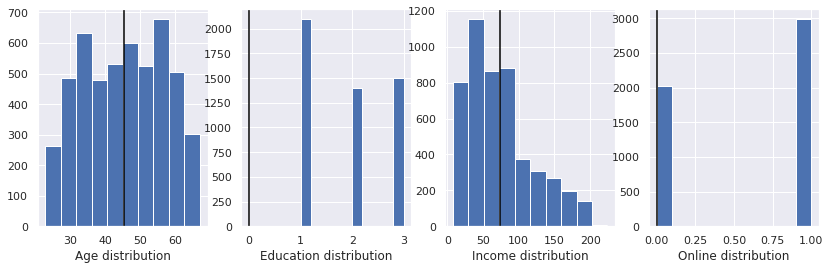

In [0]:
fig, [ax0, ax1, ax2, ax3] = plot.subplots(1,4, figsize = (14,4))

ax0.hist(df.Age)
ax0.set_xlabel('Age distribution')
ax0.axvline(df.Age.mean(), color = "black")

ax1.hist(df.Education)
ax1.set_xlabel('Education distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

ax3.hist(df.Online)
ax3.set_xlabel('Online distribution')
ax3.axvline(0, color = "black");

**Age:** 35, 45, and 55yrs represents majority of the customers

**Education:** About half of the customers are undergradutes, which represents 2300 people.

**Income:** Average income bracket for customers is $50k

**Online:** About 60% of customers (2800) use online banking facilities.

**To what degree does family size affect credit card spending?**

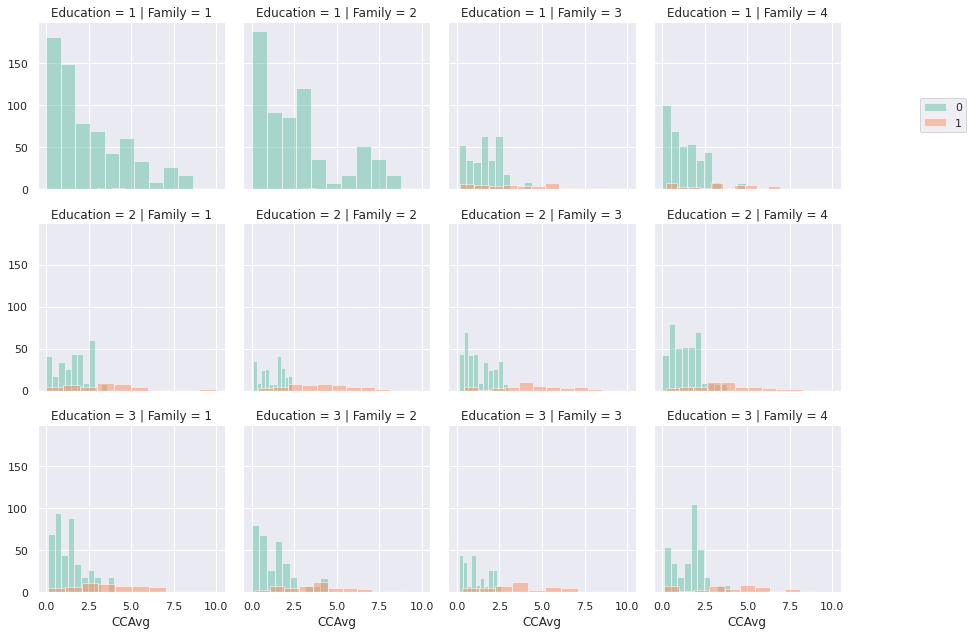

In [0]:
df_loan_accept=df[df['PersonalLoan']==1]
sns.set_style('darkgrid')
g=sns.FacetGrid(df,row='Education',col='Family',hue='PersonalLoan',palette='Set2')
g=g.map(plot.hist, 'CCAvg', alpha=0.5)
plot.legend(bbox_to_anchor=(1.7,3))

It can be inferred that usually Undergraduates with a small family do not tend apply for a loan.

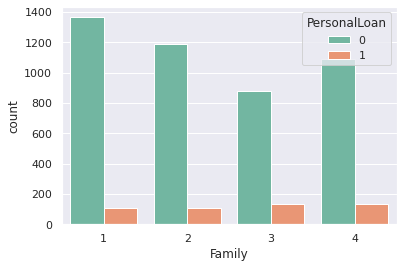

In [0]:
sns.countplot(x='Family',data=df,hue='PersonalLoan',palette='Set2')

Family size does not have any impact on personal loan. But it seems families with size of 3 are more likely to take a loan. When considering future campaign this might be good association.

Summary of the Top 3 Zipcodes that represent the highest number of customers

In [0]:
df_top_zip= df['ZIPCode'].value_counts()

df_top_zip= df_top_zip.reset_index(drop = False) 
df_top_zip.columns = ['ZIPCode', 'accts']
df_top_zip_3 = df_top_zip.head(3)

new_df = pd.merge(df, df_top_zip_3, on='ZIPCode')
new_df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard,accts
0,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,169
1,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1,169
2,37,59,35,121,94720,1,2.9,1,0,0,0,0,0,1,169
3,46,57,31,52,94720,4,2.5,1,0,0,0,0,0,1,169
4,52,61,37,131,94720,1,2.9,1,0,0,0,0,1,0,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,4831,37,12,60,95616,4,2.1,3,217,0,0,0,1,0,116
408,4862,49,24,18,95616,1,0.4,3,121,0,0,0,1,0,116
409,4872,46,22,53,95616,4,1.9,1,187,0,0,0,0,0,116
410,4918,36,10,33,95616,4,1.2,2,82,0,1,0,1,0,116


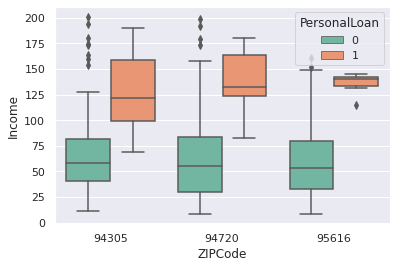

In [0]:
sns.boxplot(x="ZIPCode", y="Income", data=df[df.ZIPCode.isin([95616, 94720,94305]) ], hue= 'PersonalLoan', palette="Set2")
 

Yes Zip Code reflects the size of income. Customers who live in these zip codes are pegged in the highest income bracket. Unfortunately they also represent a large number of the bank customers who have already taken a Personal Loan from the bank. This will be relevant to investors in the housing market. Such data could be used to predict the quality of education in local school districts in surrounding zip codes, enabling houses to be priced higher.

**Is age a factor when considering customers who use online services at the bank?**

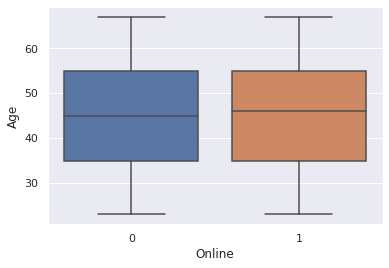

In [0]:
sns.boxplot(x = 'Online', y = 'Age', data= df)

Age is not a factor. About the same category of people who use online services at the bank also do not.

**Are college graduates likely to live in more expensive homes?**

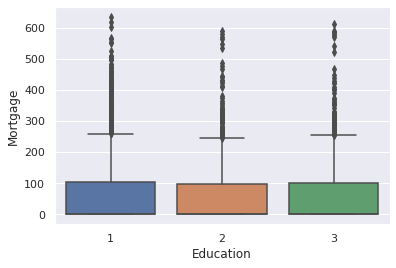

In [0]:
sns.boxplot(x = 'Education', y = 'Mortgage', data= df)

Not neccesarily! 

**Observations**

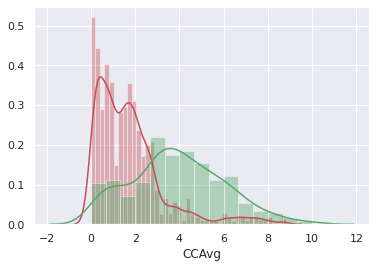

In [0]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

The graph show persons who have personal loans have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

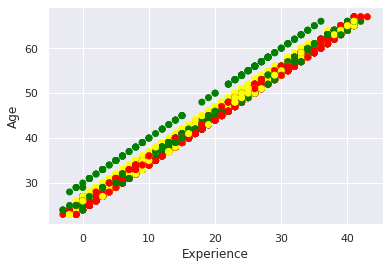

In [0]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

The plot shows that experience and age have a positive correlation. As experience increases age also increases. In addition, the colors show the education level. There is also a gap in age for customers in their mid forties.

Correlation with heat map

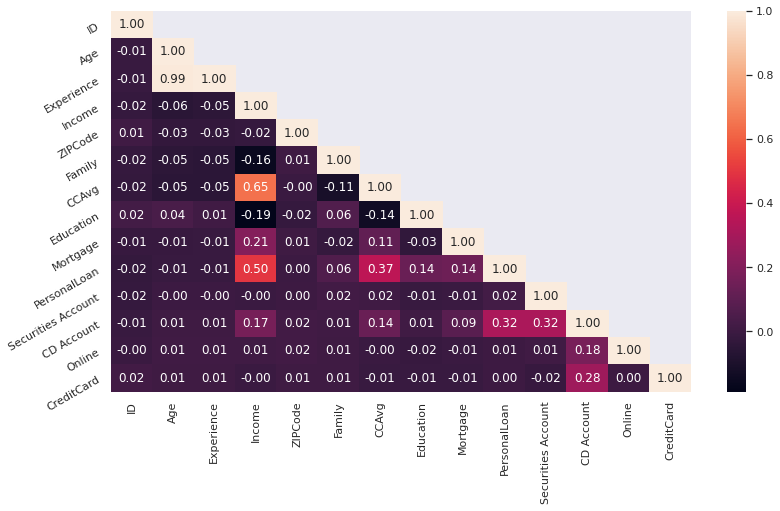

In [0]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plot.figure(figsize=(13,7))
# Let's create a mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

*   Income and CCAvg is moderately correlated.
*   Age and Experience is highly correlated.

Let's check our confidence about the above statments with a logistic regression model:

Since we found strong association between 'Age' and 'Experience' we decided to exclude 'Experience' from the analysis to avoid multicollinearity.

Focus: ** Age, Income, CCAvg, and Mortgage**



In [0]:
import statsmodels.api as sm

In [0]:
quant_df = df[['PersonalLoan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()
quant_df['intercept'] = 1
log_mod = sm.Logit(quant_df['PersonalLoan'], quant_df[['intercept', 'Age', 'Income', 'CCAvg', 'Mortgage']]).fit()


Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 8


Correlation Table

In [0]:
quant_df.corr()

,PersonalLoan,Age,Income,CCAvg,Mortgage,intercept
PersonalLoan,1.000000,-0.007726,0.502462,0.366889,0.142095,NaN
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539,NaN
Income,0.502462,-0.055269,1.000000,0.645984,0.206806,NaN
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905,NaN
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.3657
Time:                        13:30:00   Log-Likelihood:                -1002.9
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                4.742e-249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5144      0.308    -21.155      0.000      -7.118      -5.911
Age            0.0080      0.005      1.550      0.121      -0.002       0.018
Income         0.0351      0.002     22.313      0.000       0.032       0.038
CCAvg          0.0688      0.029      2.409      0.016       0.013       0.125
Mortgage       0.0007      0.000      1.757      0.079   -8.49e-05       0.002
==============================================================================
"""

The bar chart of P-Values distribution and threshold line

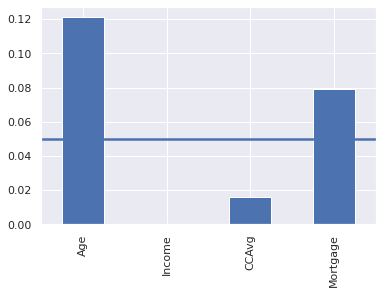

In [0]:
log_mod.pvalues[1:5].plot.bar()
plot.axhline(y = 0.05);

We can say with confidence that 'Income' and 'CCAvg' both have statisticaly significant association with 'Personal Loan', since their p-value in logistic regression is < 0.05

The bar chart of coefficient distribution

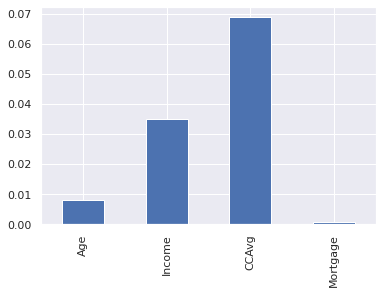

In [0]:
log_mod.params[1:5].plot.bar();

'CCAvg' has strongest association with 'Personal Loan'

Filter columns with P-values less than 0.05, store variables and it's coefficients into the dictionary

In [0]:
quant_df_main = {}
for i in log_mod.params[1:5].to_dict().keys():
    if log_mod.pvalues[i] < 0.05:
        quant_df_main[i] = log_mod.params[i]
    else:
        continue
quant_df_main

{'CCAvg': 0.06879676197631962, 'Income': 0.03508674970778918}

Compute the odds:

In [0]:
quant_df_main_odds = {k : np.exp(v) for k, v in quant_df_main.items()}
quant_df_main_odds

{'CCAvg': 1.0712184746974085, 'Income': 1.0357095524036393}

Conclusion:

'Personal Loan' has statisticaly significant association with:

        'Income' : coef = 0.03508
        'CCAvg' : coef = 0.06879

Both variables are positively associated with 'Personal Loan'. As soon as both have one unit as $1000 we may say the following:

        For each $1000 increase in 'Income' we expect the odds to sell Personal Loan to increase by 3.57%, holding everything else constant

        For each $1000 increase in 'CCAvg' we expect the odds to sell Personal Loan to increase by 7.12%, holding everything else constant



Let's test the hypothesis for **Family and Education**..

In [0]:
cat_df = df[['Family', 'Education', 'PersonalLoan']].copy()

In [0]:
cat_df.corr()

,Family,Education,PersonalLoan
Family,1.000000,0.064929,0.061367
Education,0.064929,1.000000,0.136722
PersonalLoan,0.061367,0.136722,1.000000


In [0]:
cat_df.corr()['PersonalLoan'][0:2]

Family       0.061367
Education    0.136722
Name: PersonalLoan, dtype: float64

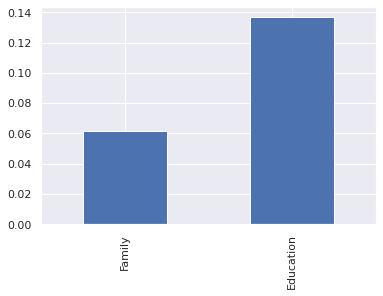

In [0]:
cat_df.corr()['PersonalLoan'][0:2].plot.bar();

'Family' and 'Education' has low association with 'Personal Loan'

In [0]:
cat_df['intercept'] = 1
log_mod = sm.Logit(cat_df['PersonalLoan'], cat_df[['intercept', 'Family', 'Education']]).fit()

Optimization terminated successfully.
         Current function value: 0.305406
         Iterations 7


In [0]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 May 2020   Pseudo R-squ.:                 0.03415
Time:                        13:30:00   Log-Likelihood:                -1527.0
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.575e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7670      0.175    -21.574      0.000      -4.109      -3.425
Family         0.1623      0.042      3.863      0.000       0.080       0.245
Education      0.5487      0.059      9.260      0.000       0.433       0.665
==============================================================================
"""

The bar chart of coefficient distribution

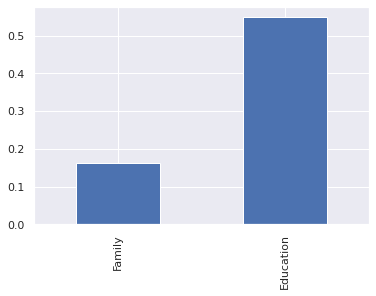

In [0]:
log_mod.params[1:3].plot.bar();

'Education' has strongest association with 'Personal Loan'

We can confidently say that 'Family' and 'Education' have statisticaly significant association with 'Personal Loan', since their p-value in logistic regression is < 0.05

In [0]:
cat_df_main = {}
for i in log_mod.params[1:3].to_dict().keys():
    if log_mod.pvalues[i] < 0.05:
        cat_df_main[i] = log_mod.params[i]
    else:
        continue
cat_df_main

{'Education': 0.5487286631107702, 'Family': 0.16231785074803864}

Compute the odds

In [0]:
cat_df_odds = {k : np.exp(v) for k, v in cat_df_main.items()}
cat_df_odds

{'Education': 1.7310508695002493, 'Family': 1.176234048782636}

**Conclusion:**

'Personal Loan' has statisticaly significant association with:

        'Family' : coef = 0.16231
        'Education' : coef = 0.54873

Both variables are positively associated with 'Personal Loan'. We may say the following:

        For each unit increase in 'Family' we expect the odds to sell Personal Loan to increase by 17.62%, holding everything else constant

        For each unit increase in 'Education' we expect the odds to sell Personal Loan to increase by 73.11%, holding everything else constant

